In [19]:
import sys
import cv2
import math
import pywt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')
from models.DWT2 import DWT, IDWT

In [20]:
name="db4"


In [21]:
img = cv2.imread("../input/LennaGrey.png",0)
img_ex = np.expand_dims(img, axis=-1)
img_ex = np.expand_dims(img_ex, axis=0)

model = keras.Sequential()
model.add(keras.Input(shape=(512, 512, 1)))
model.add(DWT(name=name))
model.summary()

coeffs = model.predict(img_ex)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dwt_1_db4 (DWT)              (None, 259, 259, 4)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
(259, 259, 4)


In [32]:
model = keras.Sequential()
model.add(keras.Input(shape=coeffs[0].shape))
model.add(IDWT(name=name))
model.summary()

my_recon = model.predict(coeffs)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
idwt_2_db4 (IDWT)            (None, 512, 512, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


LL shape (259, 259)


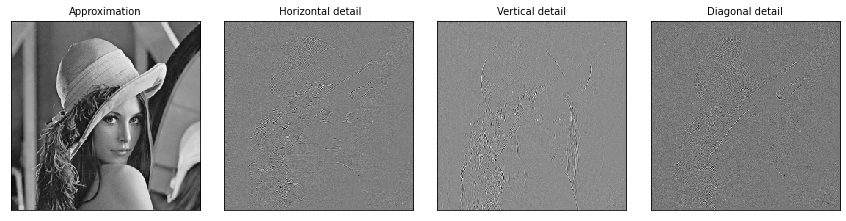

In [23]:
import matplotlib.pyplot as plt
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(img, name)
LL2, (LH2, HL2, HH2) = coeffs2
print("LL shape", LL2.shape)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2, LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

(512, 512)


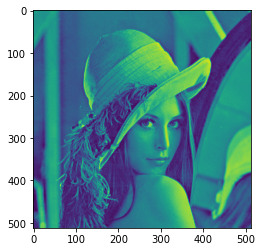

In [24]:
recon_pywt = pywt.idwt2(coeffs2, name)
print(recon_pywt.shape)
plt.imshow(recon_pywt)
plt.show()

LL shape (259, 259)


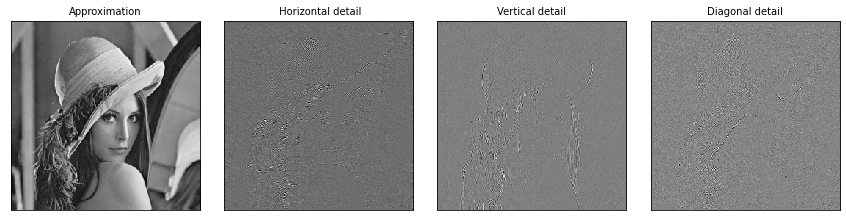

In [25]:

LL = coeffs[0, :, :, 0]
LH = coeffs[0, :, :, 1]
HL = coeffs[0, :, :, 2]
HH = coeffs[0, :, :, 3]
print("LL shape", LL.shape)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

(512, 512)


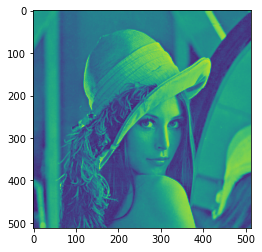

In [26]:
my_recon_img = my_recon[0,:,:,0]
print(my_recon_img.shape)
plt.imshow(my_recon_img)
plt.show()

In [27]:
import numpy as np


def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    return err

In [33]:
mse(recon_pywt,my_recon_img)

12.23957090386316

In [34]:
recon_pywt[0,0]

144.0

In [35]:
my_recon_img[0,0]

143.67422